In [1]:
import pandas as pd
pd.set_option('display.max_colwidth', None)

from analysis_tools.analysis import *
from analysis_tools.preprocess import anonymous_head

import warnings
warnings.filterwarnings("ignore")

p_500_df = read_csv("data/extracted/rnd_500_patients.csv")
p_f_df = read_csv("data/extracted/full_patients.csv")

# Hierarchy Clustering

For clustering part, we will use hierachical clustering with two different distance funtion, Euclidean distance and cosine distance.

The hierachical clustering, bottom-up clustering, is a good way to start.

1. Since we have the massive amounts of patient data in high dimensional space, it is hard to visualize the data and decide the number of clusters. However, the bottom-up hierachical clustering allows us to start from each patient and merge the patients who is close to each other. Thus, we don't have to decide the number of clusters first.

2. The hierachical cluster can utilize to use any distance or similarity. We will also use different distance measurement for slightly different data, so utilization is important for the analysis.

#### **Visualization**
For the visualization part, we will use the similar idea of 'gene map'.
Since each columns of the information-matrix represent the bins, we can expand the matrix as whole dataframe that each rows represent the unique patients and each columns represent the bins.

Then, we will color the each data points with the color of medication. If the patient has two different medication, then the data point will be colored as mixture of color of two medications.

The hierachical clustering will change the order of patients so, when the color will show certain patterns if the data is well clustered.

In [2]:
print("Original data form:")
anonymous_head(p_500_df, 1)

Original data form:


,patient_id,info_mat,all_medications
0,5c69982c,"[[0, 8, 14, 0, 0, 0, 0, 0], [0, 0, 8, 0, 0, 4, 0, 0], [0, 4, 0, 0, 0, 4, 0, 0], [0, 10, 0, 0, 0, 8, 0, 0], [0, 2, 0, 0, 0, 20, 0, 0], [0, 4, 0, 0, 0, 8, 0, 0], [0, 4, 0, 0, 0, 0, 0, 0], [6, 6, 0, 0, 0, 4, 0, 0], [0, 1, 0, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 4, 0, 0]]","{SUL, MET, SGLT2, Insulin}"


In [3]:
p_500_map_df = get_map(p_500_df, 2019, 2023, "half_year")
print("Map data form:")
anonymous_head(p_500_map_df, 1)

Map data form:


,patient_id,2019-H1,2019-H2,2020-H1,2020-H2,2021-H1,2021-H2,2022-H1,2022-H2,2023-H1,2023-H2
0,5c69982c,"[0, 8, 14, 0, 0, 0, 0, 0]","[0, 0, 8, 0, 0, 4, 0, 0]","[0, 4, 0, 0, 0, 4, 0, 0]","[0, 10, 0, 0, 0, 8, 0, 0]","[0, 2, 0, 0, 0, 20, 0, 0]","[0, 4, 0, 0, 0, 8, 0, 0]","[0, 4, 0, 0, 0, 0, 0, 0]","[6, 6, 0, 0, 0, 4, 0, 0]","[0, 1, 0, 0, 0, 0, 0, 0]","[0, 1, 0, 0, 0, 4, 0, 0]"


In [4]:
med_oh = load_med_oh("data/extracted/medications_one_hot_encoding.csv")

## For 500 patients

### Euclidean Distance & Cosine Distance

Now, I will use hierachy clustering with euclidean and cosine distance.

For both distance methods, I will use the same information matrix which includes the informations of how many medication the patient got and same k to see which distance method is clustering well.

### Euclidean Distance

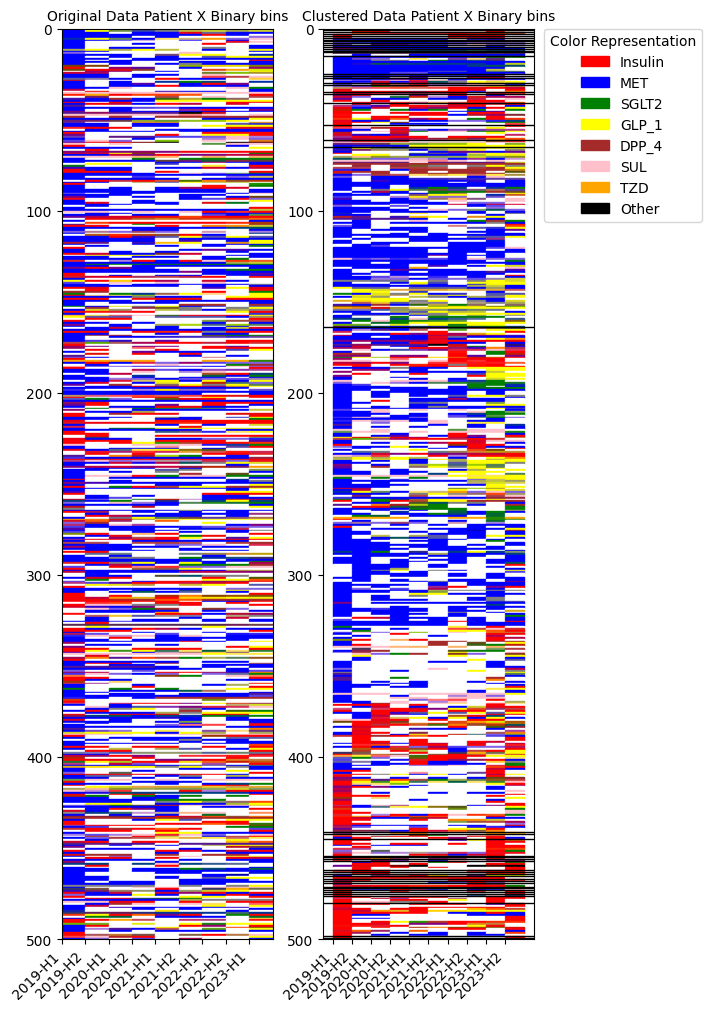

In [5]:
clusterE_p_500_map_df = cluster_patients(p_500_map_df, metric="euclidean", k=50)
plot_maps(p_500_map_df, clusterE_p_500_map_df, med_oh)

### Cosine Distance

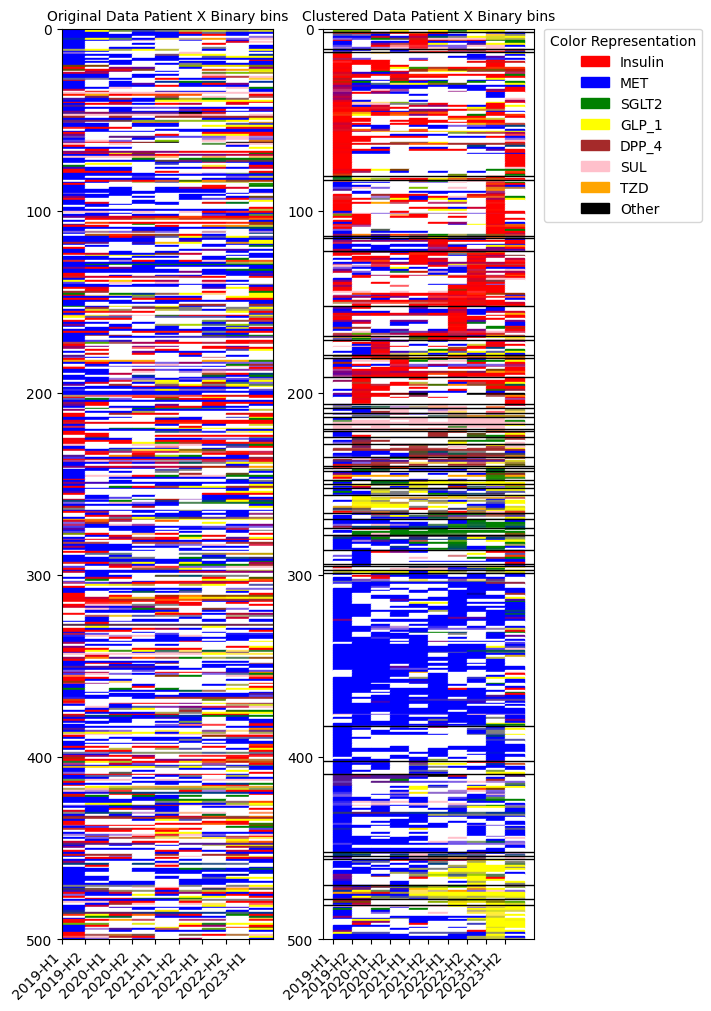

In [6]:
clusterC_p_500_map_df = cluster_patients(p_500_map_df, metric="cosine", k=50)
plot_maps(p_500_map_df, clusterC_p_500_map_df, med_oh)

The map shows that the cosine distance is clustering slightly better.
However, current information matrix includes the information of how many medication the patient prescribed. Since I want to see the sequance of the medications, let's make the information matrix as binary information matrix. Then cluster again.

## Binary Information Matrix

In [7]:
bin_p_500_map_df = binarize_data(p_500_map_df)

### Euclidean Distance

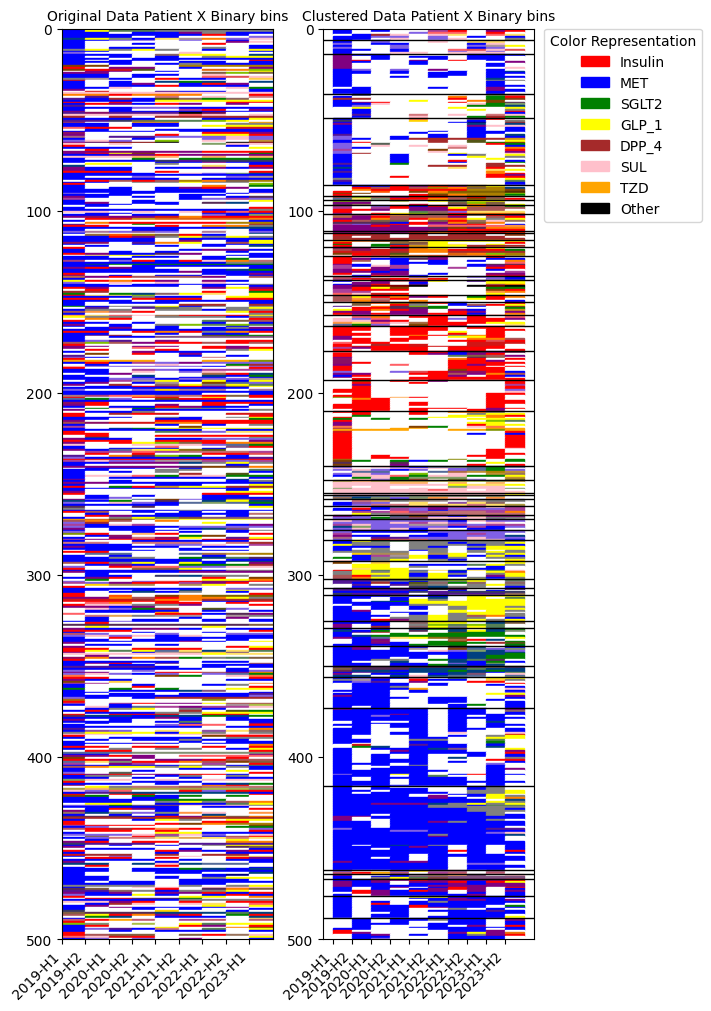

In [8]:
clusterE_bin_p_500_map_df = cluster_patients(bin_p_500_map_df, metric="euclidean", k=50)
plot_maps(bin_p_500_map_df, clusterE_bin_p_500_map_df, med_oh)

### Cosine Distance

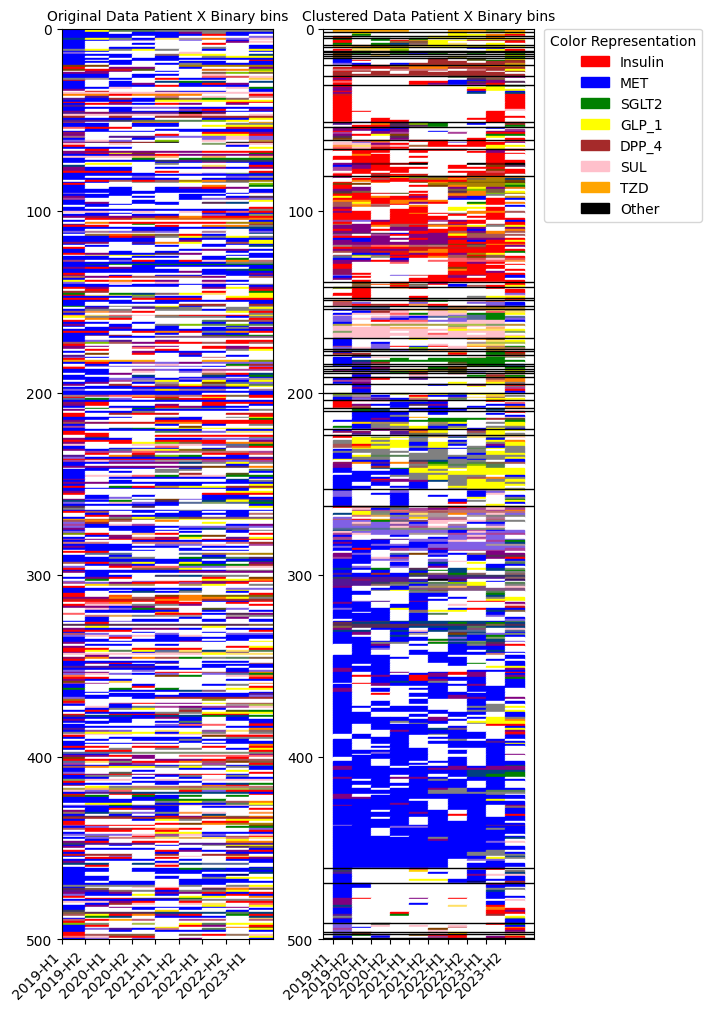

In [9]:
clusterC_bin_p_500_map_df = cluster_patients(bin_p_500_map_df, metric="cosine", k=50)
plot_maps(bin_p_500_map_df, clusterC_bin_p_500_map_df, med_oh)

# Final

Now, with the result from above, I learned that clustering the binarized map with hierachy clustering using euclidean distance cluster the patient well. Now, I need to choose which k would best fit in my clustering analysis.

In [10]:
fianl_map_df = get_map(p_f_df)
binarize_final_df = binarize_data(fianl_map_df)

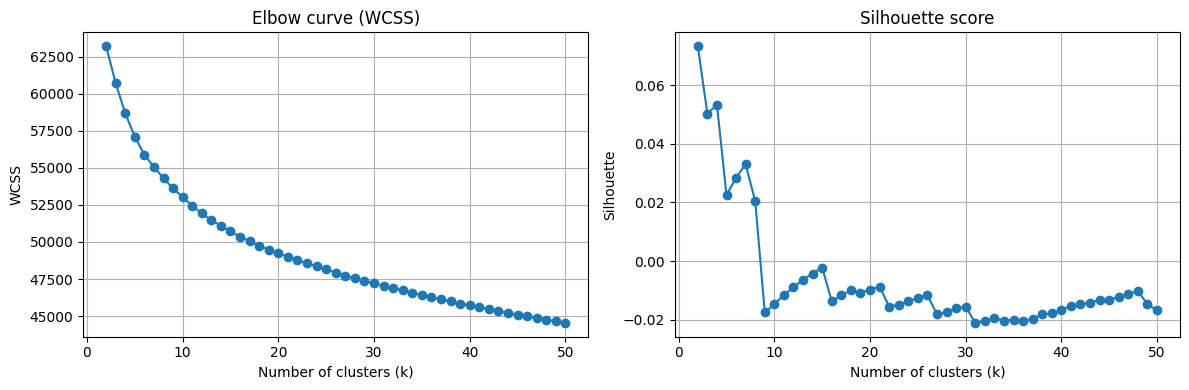

In [11]:
k_evaluation(binarize_final_df, method="ward", metric="euclidean", k_max=50)

According to the elbow curve with silhouette score, k = 14 has the closest silhouette score to 0 and has well curved point for WCSS. However, there should be a debate on selecting k since the complication of patient data. Thus, in this step, I decided to get opinions from expertise.

Possible k: 14, 20, 25

In [12]:
k_14_clusters = cluster_patients(binarize_final_df, metric="euclidean", k=14)
k_20_clusters = cluster_patients(binarize_final_df, metric="euclidean", k=20)
k_25_clusters = cluster_patients(binarize_final_df, metric="euclidean", k=25)

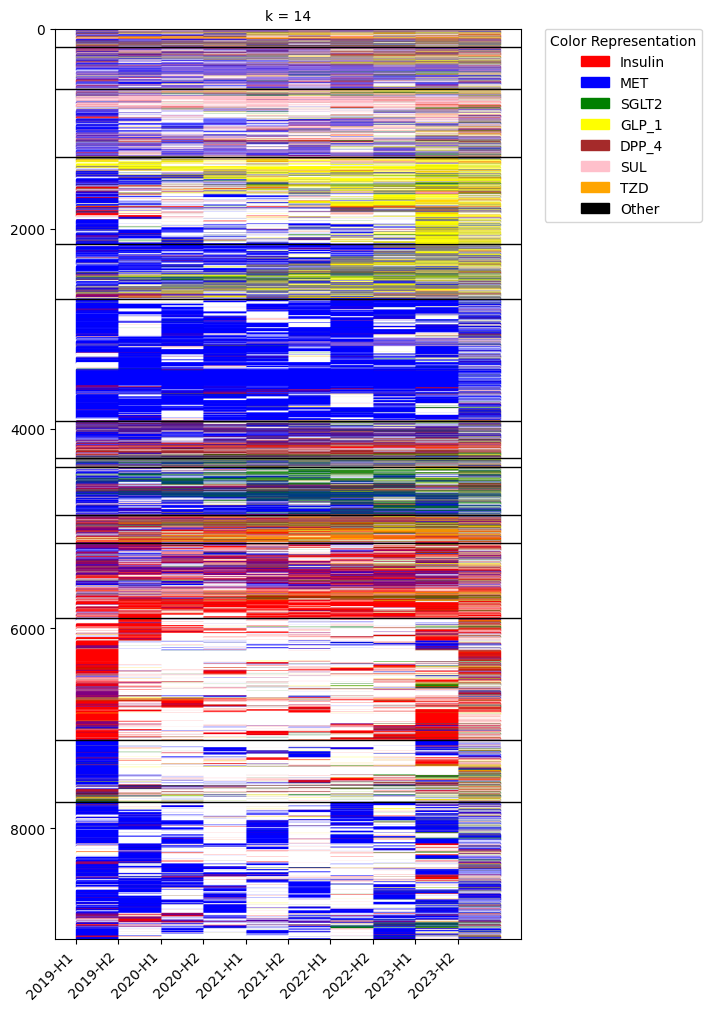

In [13]:
plot_clustered_map(k_14_clusters, med_oh, "k = 14")

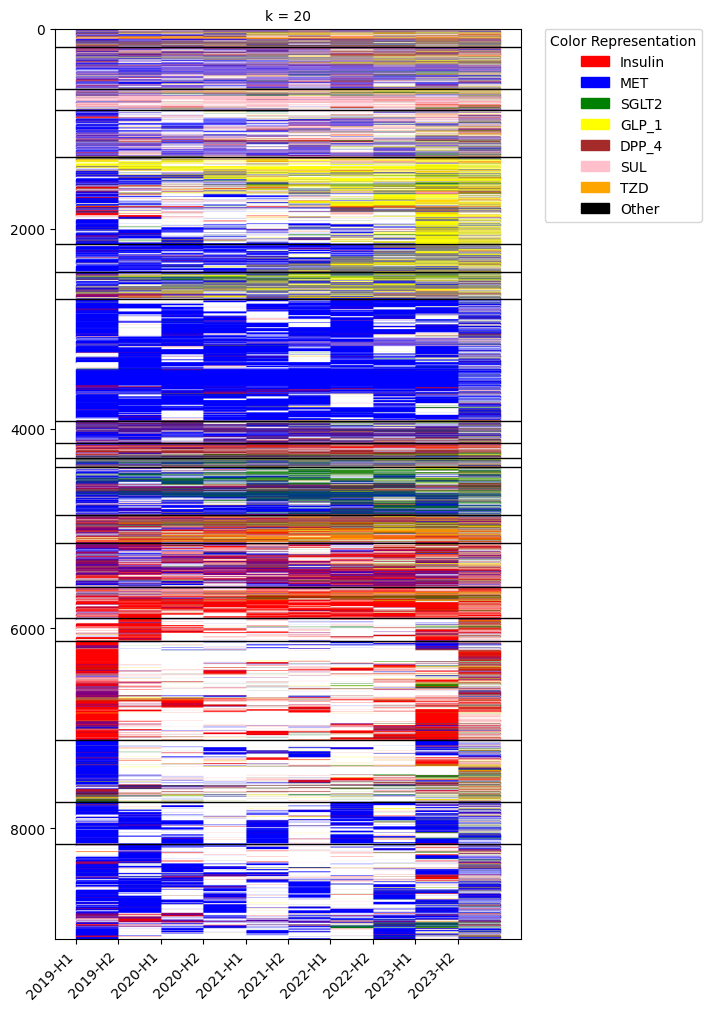

In [14]:
plot_clustered_map(k_20_clusters, med_oh, "k = 20")

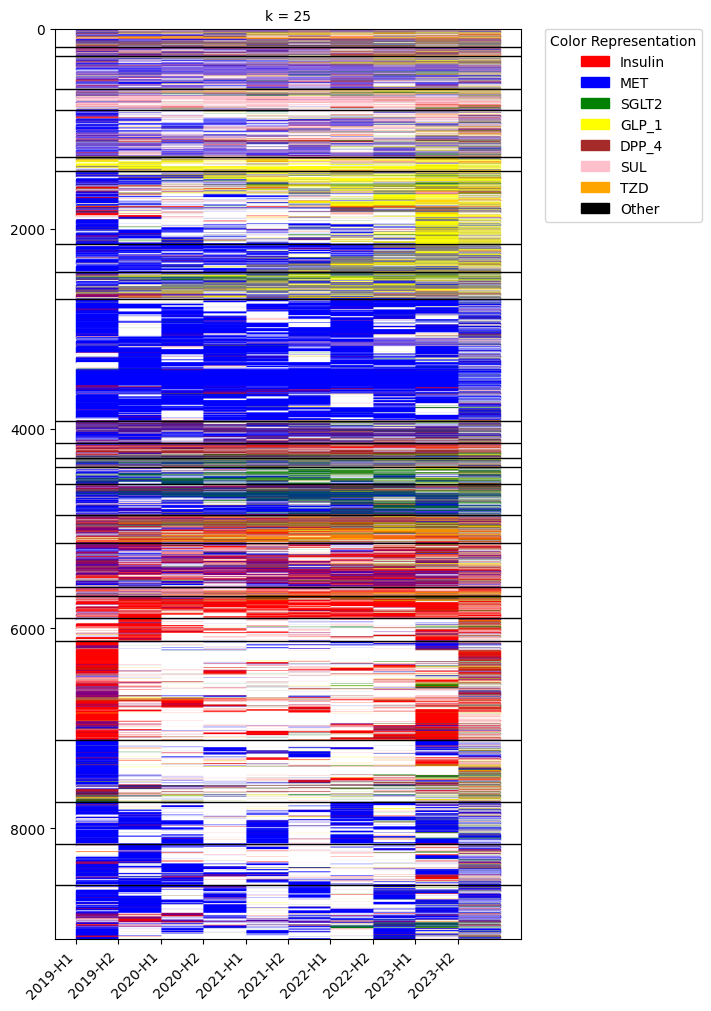

In [15]:
plot_clustered_map(k_25_clusters, med_oh, "k = 25")

## Final Method

Combining all analysis result from above, we got euclidean distance with ward cluster when k = 25 shows the best clustring result.

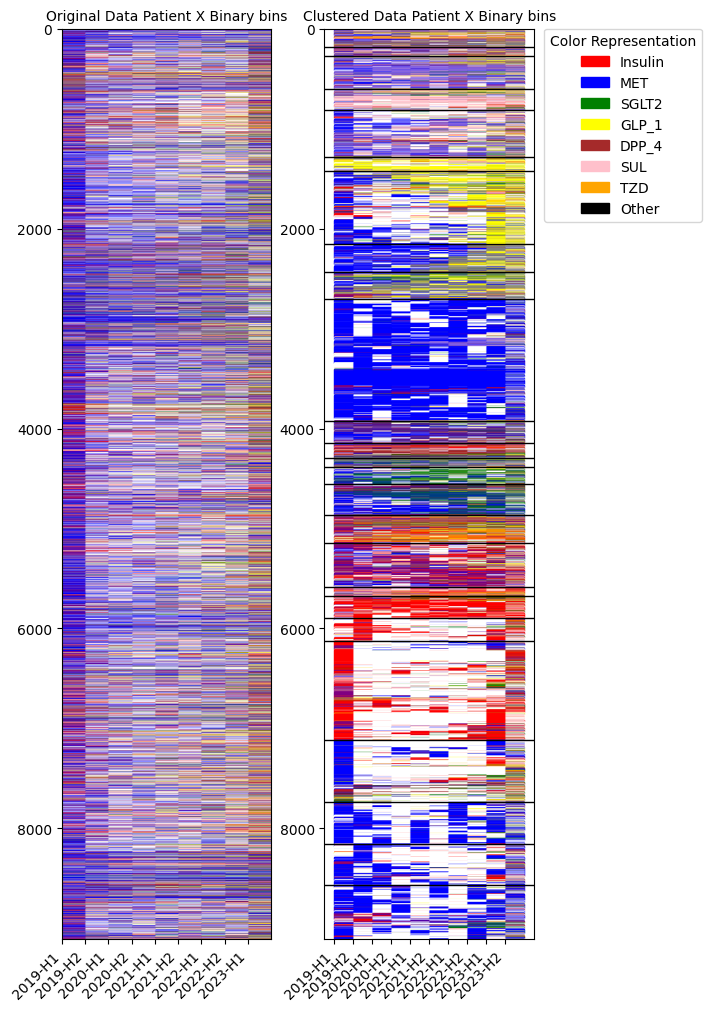

In [16]:
final_clustered_patients = cluster_patients(binarize_final_df, metric="euclidean", k=25)
plot_maps(binarize_final_df, final_clustered_patients, med_oh)

## Additional Analysis

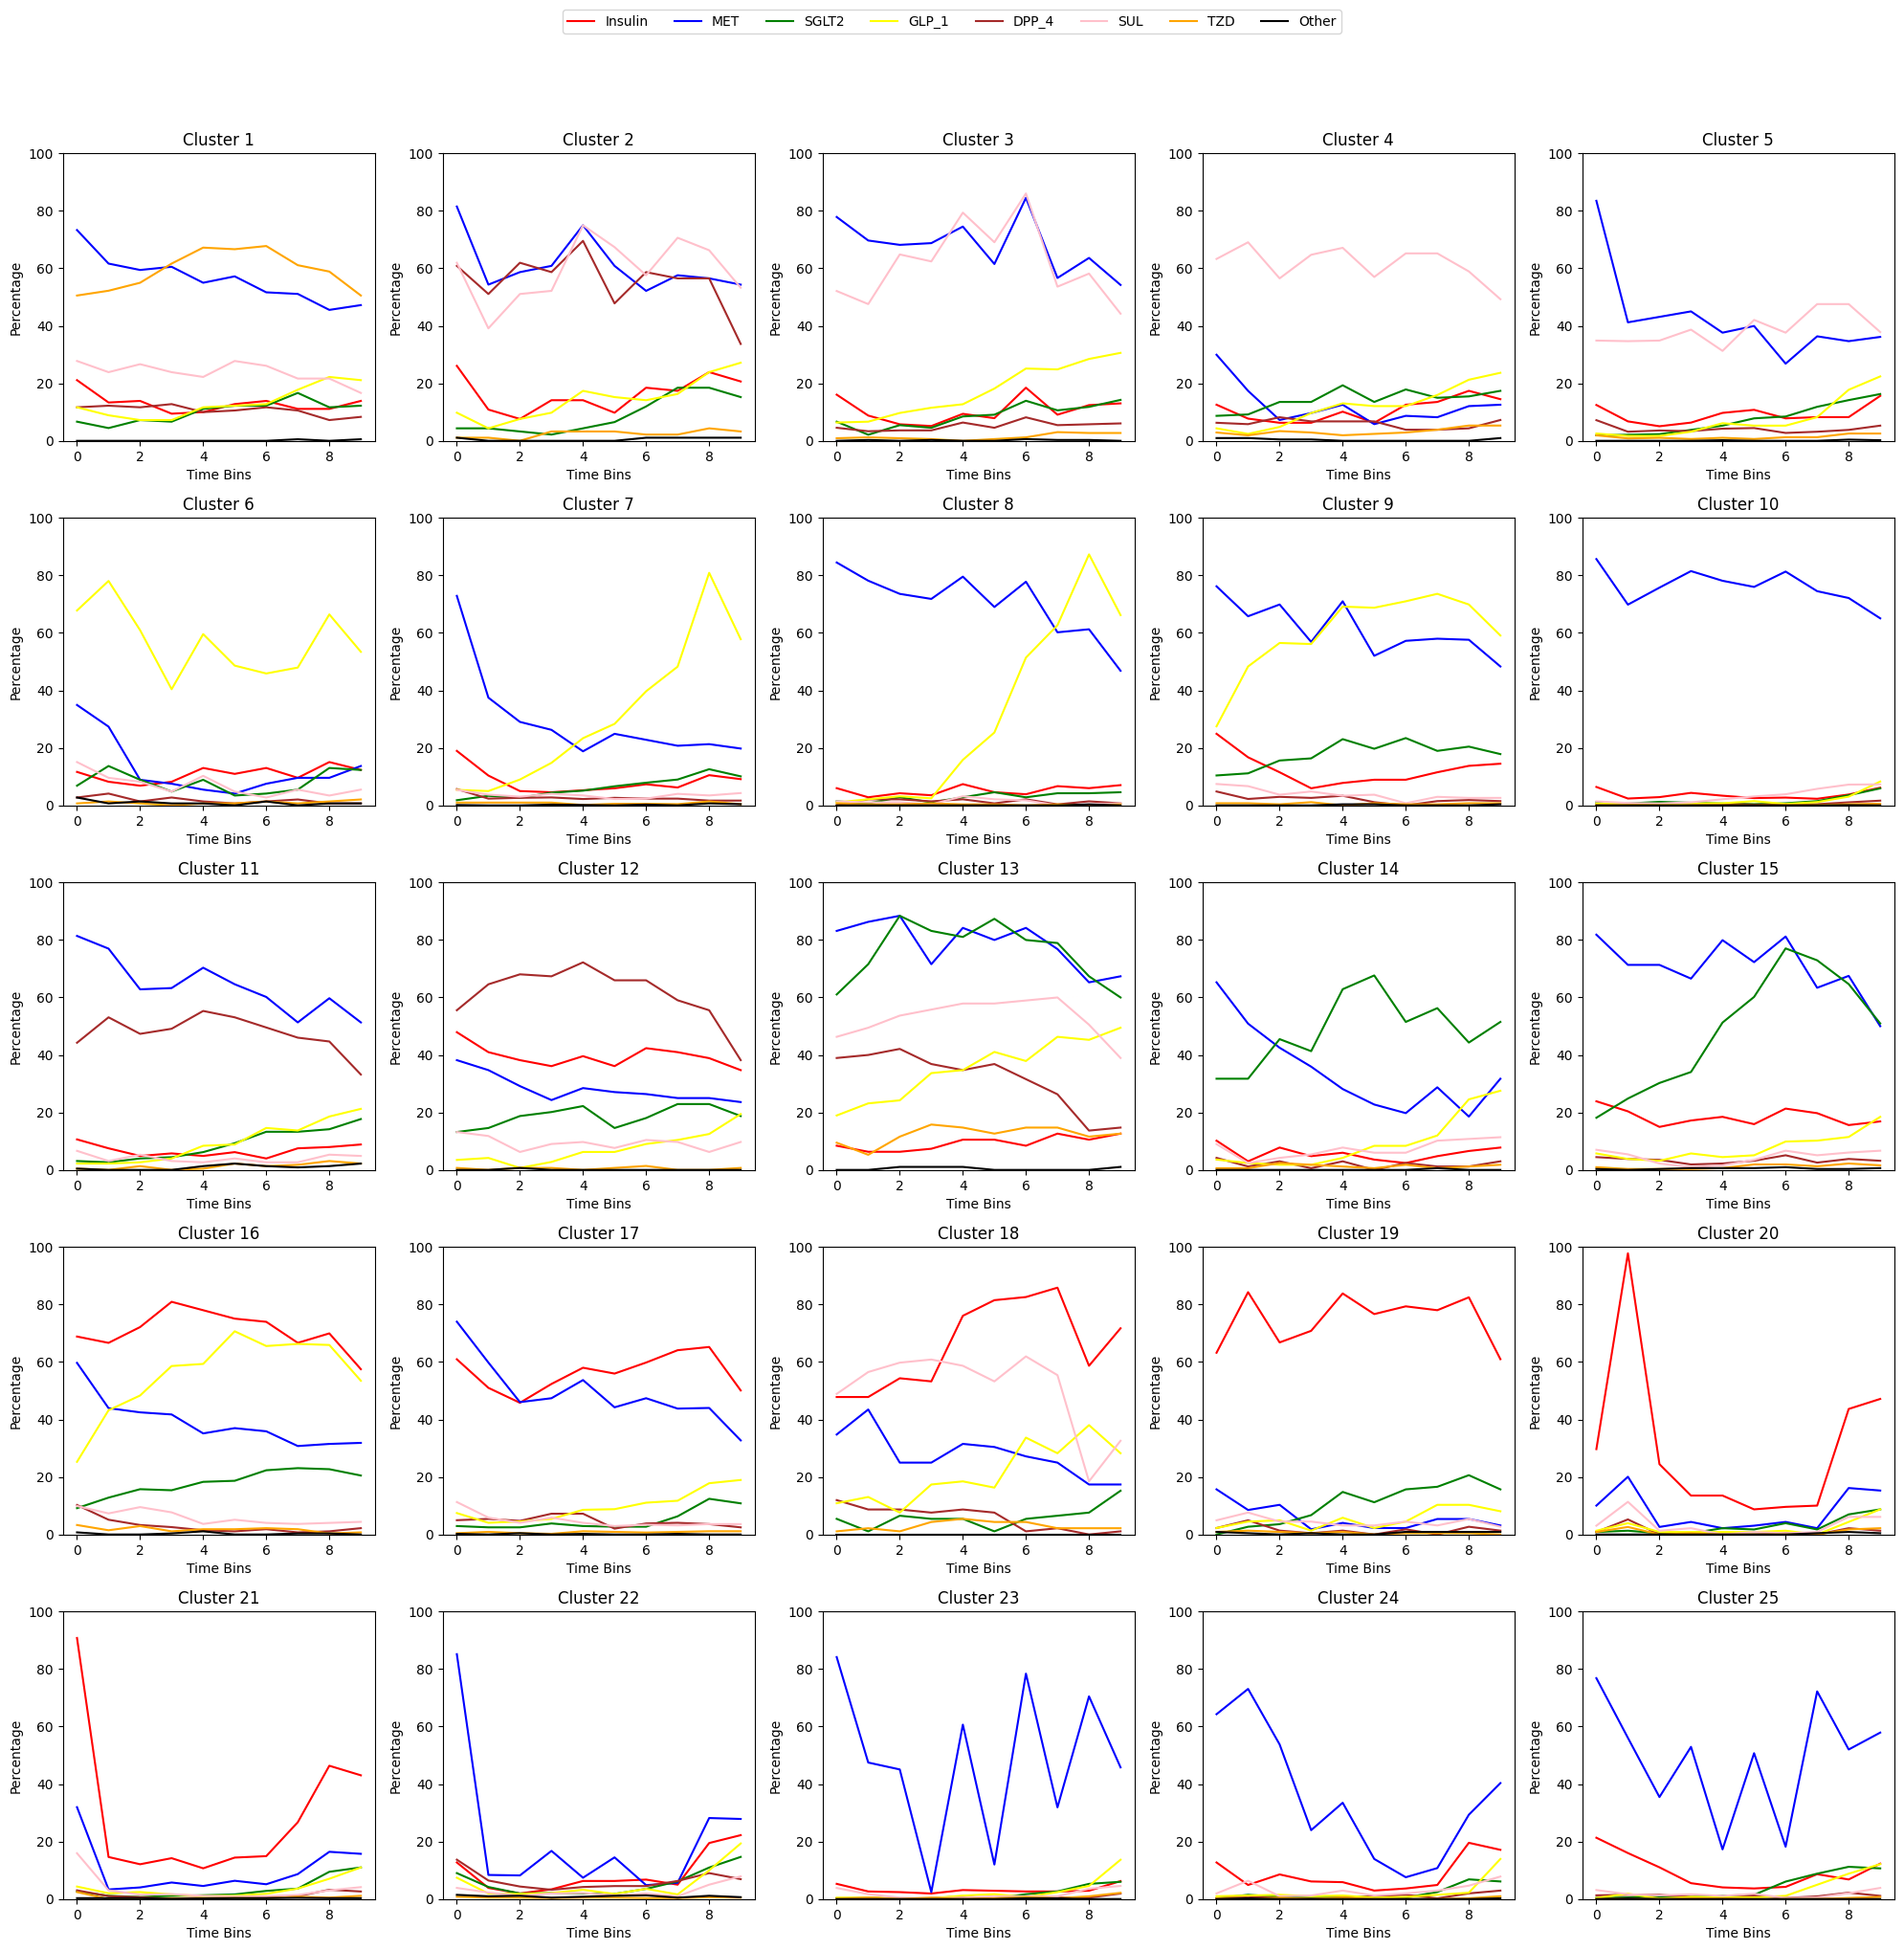

In [17]:
plot_clusters_line_graphs(k_25_clusters)